<a href="https://colab.research.google.com/github/ho44013/machine_study/blob/main/data_science/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Linear Regression Practice

In [ ]:
import torch

x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
y = torch.FloatTensor([[1,2,3], [4,5,6]])

print("x = ", x)
print("y = ", y)
print("Size: ", len(x.size()))
print("Shape: ", x.shape)
print("차원(랭크): ", x.ndimension())

x =  tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
y =  tensor([[1., 2., 3.],
        [4., 5., 6.]])
Size:  2
Shape:  torch.Size([3, 3])
차원(랭크):  2


In [ ]:
x0 = torch.unsqueeze(x, 0)
x1 = torch.unsqueeze(x, 1)
x2 = torch.unsqueeze(x, 2)
print("x0.shape: ", x0.shape)
print("x1.shape:", x1.shape)
print("x2.shape:", x2.shape)
print("x0 =", x0)
print("x1 =", x1)
print("x2 =", x2)


x0.shape:  torch.Size([1, 3, 3])
x1.shape: torch.Size([3, 1, 3])
x2.shape: torch.Size([3, 3, 1])
x0 = tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
x1 = tensor([[[1, 2, 3]],

        [[4, 5, 6]],

        [[7, 8, 9]]])
x2 = tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])


In [ ]:
x3 = torch.squeeze(x0)
print("x3 = ", x3)
print("x3.shape = ", x3.shape)

x3 =  tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
x3.shape =  torch.Size([3, 3])


In [ ]:
x4 = x.view(9)
x5 = x.view(1, 3, 3)
print("x4 = ", x4)
print("x5 = ", x5)

x4 =  tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
x5 =  tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


In [ ]:
x = torch.FloatTensor([[1,2], [3,4], [5,6]])
w = torch.randn(1,2, dtype=torch.float)
b = torch.randn(3,1, dtype=torch.float)

result = x @ torch.t(w) + b
print(result)

tensor([[-0.0946],
        [-0.7188],
        [-2.6790]])


In [ ]:
w = torch.tensor(1.0, requires_grad=True)
a = w*3
l = a**2
l.backward()

print('l을 w로 미분한 값은', w.grad)

l을 w로 미분한 값은 tensor(18.)


In [ ]:
x_train = torch.FloatTensor([[1,2], [3,2], [3,7], [1,1], [1,0]])
y_train = torch.FloatTensor([[4], [8], [23], [1], [-2]])

W = torch.randn(2,1)
b = torch.randn(1,1)
lr = 0.01

for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.mm(x_train, W) + b
  cost = torch.mean((hypothesis - y_train) ** 2)

  cost.backward()
  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr * b.grad

    if epoch % 100 == 0:
      print(f"epoch: {epoch}, cost: {cost:.6f}, W: {W.squeeze()}, b: {b}")

x_test = torch.FloatTensor([[5, 10]])
test_result = torch.mm(x_test, W) + b
print(test_result.item())

tensor([[-1.0511],
        [ 0.9600]]) tensor([[-0.6418]])
epoch: 0, cost: 103.573708, W: tensor([-0.6709,  1.6382]), b: tensor([[-0.5012]])
epoch: 100, cost: 1.542468, W: tensor([0.4680, 3.2545]), b: tensor([[-1.3941]])
epoch: 200, cost: 0.790740, W: tensor([0.8766, 3.2007]), b: tensor([[-2.1493]])
epoch: 300, cost: 0.406350, W: tensor([1.1918, 3.1460]), b: tensor([[-2.6752]])
epoch: 400, cost: 0.208831, W: tensor([1.4203, 3.1049]), b: tensor([[-3.0505]])
epoch: 500, cost: 0.107322, W: tensor([1.5844, 3.0752]), b: tensor([[-3.3194]])
epoch: 600, cost: 0.055155, W: tensor([1.7021, 3.0539]), b: tensor([[-3.5121]])
epoch: 700, cost: 0.028345, W: tensor([1.7864, 3.0387]), b: tensor([[-3.6502]])
epoch: 800, cost: 0.014567, W: tensor([1.8469, 3.0277]), b: tensor([[-3.7492]])
epoch: 900, cost: 0.007486, W: tensor([1.8902, 3.0199]), b: tensor([[-3.8202]])
epoch: 1000, cost: 0.003847, W: tensor([1.9213, 3.0142]), b: tensor([[-3.8711]])
epoch: 1100, cost: 0.001977, W: tensor([1.9436, 3.0102]), 

In [ ]:
from sklearn.linear_model import LinearRegression

x = [[1, 2, 7], [3, 2, 5], [3, 7, 2], [1, 1, 1], [1, 0, -5]]
y = [[4], [8], [23], [1], [-2]]

lr = LinearRegression()
lr.fit(x, y)

print(lr.coef_, lr.intercept_)
print(lr.predict([[5, 10, 10]]))

[[2. 3. 0.]] [-4.]
[[36.]]


# 2. Logistic Regression Practice

In [ ]:
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

W = torch.rand(1,1)
b = torch.rand(1,1)

lr = 1.0

for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  h = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))

  cost.backward()
  with torch.no_grad() as grd:
    W = W - lr * W.grad
    b = b - lr * b.grad

    if epoch % 100 == 0:
      print(f"epoch: {epoch}, cost: {cost:.6f}, W: {W.squeeze():.6f}, b: {b.squeeze():.6f}")

x_test = torch.FloatTensor([[4.5], [1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

epoch: 0, cost: 0.743404, W: -0.357853, b: 0.012425
epoch: 100, cost: 0.420165, W: -1.452150, b: 4.409600
epoch: 200, cost: 0.398705, W: -1.898918, b: 5.775224
epoch: 300, cost: 0.390813, W: -2.174649, b: 6.610539
epoch: 400, cost: 0.387005, W: -2.367565, b: 7.192312
epoch: 500, cost: 0.384922, W: -2.510805, b: 7.623068
epoch: 600, cost: 0.383697, W: -2.620919, b: 7.953582
epoch: 700, cost: 0.382943, W: -2.707509, b: 8.213139
epoch: 800, cost: 0.382462, W: -2.776686, b: 8.420290
epoch: 900, cost: 0.382149, W: -2.832593, b: 8.587576
epoch: 1000, cost: 0.381941, W: -2.878172, b: 8.723877
epoch: 1100, cost: 0.381801, W: -2.915580, b: 8.835689
epoch: 1200, cost: 0.381706, W: -2.946442, b: 8.927902
epoch: 1300, cost: 0.381641, W: -2.972012, b: 9.004277
epoch: 1400, cost: 0.381596, W: -2.993268, b: 9.067752
epoch: 1500, cost: 0.381565, W: -3.010989, b: 9.120659
epoch: 1600, cost: 0.381543, W: -3.025795, b: 9.164855
epoch: 1700, cost: 0.381528, W: -3.038186, b: 9.201839
epoch: 1800, cost: 0.3

In [ ]:
import torch
import matplotlib.pyplot as plt

x_train = torch.FloatTensor([[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]])
y_train = torch.FloatTensor([[1], [1], [1], [0], [0], [0], [0], [1], [0], [1], [1], [1]])

W = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

optimizer = torch.optim.SGD([W,b], lr=1.0)
# optimizer = torch.optim.Adam([W,b], lr=0.1)
# optimizer = torch.optim.Adadelta([W,b])
# optimizer = torch.optim.Adagrad([W,b], lr=1)
# # 이 optimizer는 값이 이상하게 나오던데 왜인지는 모르겠음
# optimizer = torch.optim.RMSprop([W,b])


for epoch in range(3001):
    h = torch.sigmoid(x_train @ W + b)
    cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    with torch.no_grad() as grd:
        if epoch % 100 == 0:
            print(f"epoch: {epoch}, cost: {cost:.6f}, W: {W.squeeze():.6f}, b: {b.squeeze():.6f}")


epoch: 0, cost: 0.954234, W: 0.522286, b: -0.577692
epoch: 100, cost: 0.422561, W: -1.415626, b: 4.297308
epoch: 200, cost: 0.399415, W: -1.878766, b: 5.713975
epoch: 300, cost: 0.391127, W: -2.161164, b: 6.569797
epoch: 400, cost: 0.387169, W: -2.357791, b: 7.162883
epoch: 500, cost: 0.385016, W: -2.503402, b: 7.600829
epoch: 600, cost: 0.383754, W: -2.615155, b: 7.936296
epoch: 700, cost: 0.382978, W: -2.702938, b: 8.199444
epoch: 800, cost: 0.382485, W: -2.773010, b: 8.409286
epoch: 900, cost: 0.382164, W: -2.829610, b: 8.578652
epoch: 1000, cost: 0.381951, W: -2.875730, b: 8.716578
epoch: 1100, cost: 0.381808, W: -2.913569, b: 8.829680
epoch: 1200, cost: 0.381711, W: -2.944781, b: 8.922938
epoch: 1300, cost: 0.381644, W: -2.970634, b: 9.000160
epoch: 1400, cost: 0.381598, W: -2.992121, b: 9.064326
epoch: 1500, cost: 0.381566, W: -3.010030, b: 9.117795
epoch: 1600, cost: 0.381544, W: -3.024992, b: 9.162457
epoch: 1700, cost: 0.381528, W: -3.037513, b: 9.199830
epoch: 1800, cost: 0.3

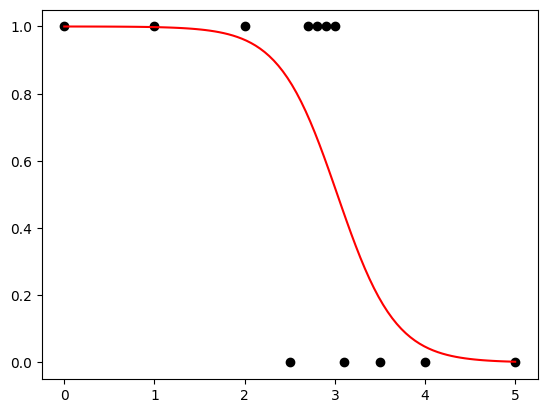

In [ ]:
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train, c="black")
X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)
plt.plot(X, Y, c="#ff0000")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1]

model = LogisticRegression(penalty=None)
model.fit(x_train, y_train)

print(model.coef_, model.intercept_)

x_test = [[4.5],[1.1]]
test_result = model.predict(x_test)
print(test_result)

[[-3.10385806]] [9.39776831]
[0 1]


# 3. Softmax Regression Practice

In [ ]:
import torch

x_train = torch.FloatTensor([[1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5],
                            [1,7,5,5], [1,2,5,6], [1,6,6,6], [1,7,7,7]])
y_train = torch.FloatTensor([[0,0,1], [0,0,1], [0,0,1], [0,1,0],
                            [0,1,0], [0,1,0], [1,0,0], [1,0,0]])

W = torch.rand(4, 3, requires_grad=True)
b = torch.rand(1, 3, requires_grad=True)
optimizer = torch.optim.Adam([W,b], lr=0.1)

for epoch in range(3001):
    h = torch.softmax(torch.mm(x_train, W) + b, dim=1)
    cost = -torch.mean(torch.sum(y_train * torch.log(h), dim=1))

    # h = (torch.mm(x_train, W) + b).softmax(dim=1)
    # cost = -(y_train * torch.log(h)).sum(dim=1).mean()


    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    with torch.no_grad():
      if epoch % 100 == 0:
        print(f"epoch: {epoch}, cost: {cost.item()}")

print(torch.argmax(h, dim= 1))

epoch: 0, cost: 1.0926320552825928
epoch: 100, cost: 0.26102447509765625
epoch: 200, cost: 0.15212231874465942
epoch: 300, cost: 0.0998399555683136
epoch: 400, cost: 0.0709516853094101
epoch: 500, cost: 0.05314202979207039
epoch: 600, cost: 0.041332367807626724
epoch: 700, cost: 0.033082395792007446
epoch: 800, cost: 0.027084778994321823
epoch: 900, cost: 0.022583408281207085
epoch: 1000, cost: 0.01911536045372486
epoch: 1100, cost: 0.016384445130825043
epoch: 1200, cost: 0.014193632639944553
epoch: 1300, cost: 0.012407924048602581
epoch: 1400, cost: 0.010932214558124542
epoch: 1500, cost: 0.009697952307760715
epoch: 1600, cost: 0.008654617704451084
epoch: 1700, cost: 0.0077643683180212975
epoch: 1800, cost: 0.006998403929173946
epoch: 1900, cost: 0.006334477104246616
epoch: 2000, cost: 0.005754970945417881
epoch: 2100, cost: 0.005246228538453579
epoch: 2200, cost: 0.0047970181331038475
epoch: 2300, cost: 0.004398487973958254
epoch: 2400, cost: 0.004043188877403736
epoch: 2500, cost: 0

In [ ]:
W.requires_grad_(False)
b.requires_grad_(False)

x_test = torch.FloatTensor([[1,11,10,9], [1,3,4,3], [1,1,0,1]])
h_test = torch.softmax(torch.mm(x_test, W) + b, dim=1)
print(h_test)
print(torch.argmax(h_test, dim=1))

tensor([[1.0000e+00, 8.6425e-19, 4.2438e-38],
        [1.8032e-03, 8.5748e-01, 1.4072e-01],
        [1.1293e-33, 6.5684e-12, 1.0000e+00]])
tensor([0, 1, 2])


In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn

x_train = torch.FloatTensor([[1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5],
                            [1,7,5,5], [1,2,5,6], [1,6,6,6], [1,7,7,7]])
y_train = torch.tensor([2, 2, 2, 1, 1, 1, 0, 0], dtype=torch.long)

# W = torch.rand(4, 3, requires_grad=True)
# b = torch.rand(1, 3, requires_grad=True)
model = nn.Linear(4,3) # W의 크기와 똑같이

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

for epoch in range(3001):
    # h = torch.mm(x_train, W) + b
    h = model(x_train)
    cost = F.cross_entropy(h, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    with torch.no_grad():
      if epoch % 100 == 0:
        print(f"epoch: {epoch}, cost: {cost.item()}")

epoch: 0, cost: 2.077101707458496
epoch: 100, cost: 0.34192538261413574
epoch: 200, cost: 0.22457635402679443
epoch: 300, cost: 0.15560947358608246
epoch: 400, cost: 0.11402758955955505
epoch: 500, cost: 0.08722130209207535
epoch: 600, cost: 0.0688886046409607
epoch: 700, cost: 0.055770546197891235
epoch: 800, cost: 0.04604986682534218
epoch: 900, cost: 0.03864268213510513
epoch: 1000, cost: 0.0328669399023056
epoch: 1100, cost: 0.02827518619596958
epoch: 1200, cost: 0.02456354908645153
epoch: 1300, cost: 0.021519947797060013
epoch: 1400, cost: 0.01899247244000435
epoch: 1500, cost: 0.01687026023864746
epoch: 1600, cost: 0.015070663765072823
epoch: 1700, cost: 0.01353122666478157
epoch: 1800, cost: 0.012203936465084553
epoch: 1900, cost: 0.011051386594772339
epoch: 2000, cost: 0.010044106282293797
epoch: 2100, cost: 0.009158704429864883
epoch: 2200, cost: 0.008376318961381912
epoch: 2300, cost: 0.0076815467327833176
epoch: 2400, cost: 0.007061811164021492
epoch: 2500, cost: 0.006506867

In [ ]:
model

Linear(in_features=4, out_features=3, bias=True)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

x_train = np.array([[1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5],
                    [1,7,5,5], [1,2,5,6], [1,6,6,6], [1,7,7,7]])
y_train = np.array([2, 2, 2, 1, 1, 1, 0, 0])

logistic = LogisticRegression(penalty=None)
logistic.fit(x_train, y_train)

pred = logistic.predict([[1,11,10,9], [1,3,4,3], [1,1,0,1]])
print(pred)

[0 1 2]
